## Machine Learning Project - Bank Customer Turnover

In [1]:
#Importing used libraries

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.naive_bayes import MultinomialNB
from dmba import classificationSummary, gainsChart
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV  
import statsmodels.api as sm 
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart 
from dmba.metric import AIC_score
from sklearn.neural_network import MLPClassifier

In [2]:
# This code reads the csv file and returns the data in a pandas dataframe

df = pd.read_csv('Churn_Modelling.csv')

# Display first 10 rows of the dataset
df.head(9)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Summary Statistics

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Missing Values

In [5]:
# Number of null values in each column

print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Duplicate Data

In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Irrelevant and Incorrect Data

In [8]:
# Dropping irrelevant columns

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineeing & Feature Selection aka EDA

<Axes: >

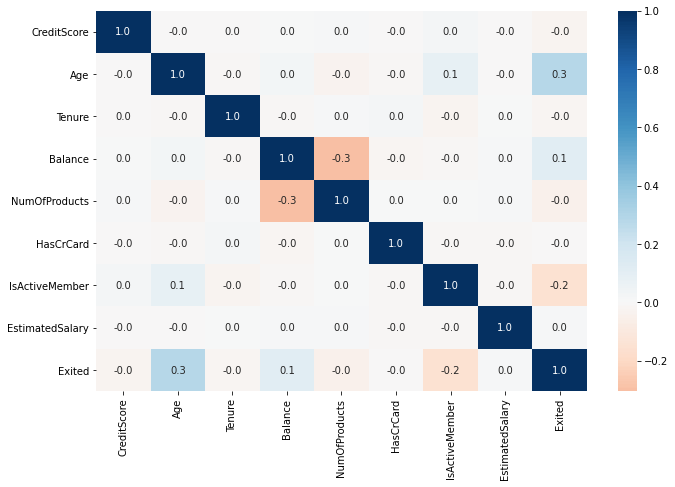

In [10]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


([<matplotlib.axis.XTick at 0x1dca36f14f0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

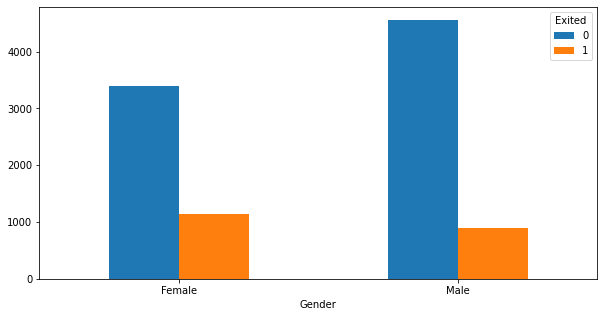

In [11]:
Gender_Crosstab=pd.crosstab(index=df.Gender,columns=df['Exited'])
print(Gender_Crosstab)
bars=('Female','Male')
y_pos = np.arange(len(bars))
Gender_Crosstab.plot.bar(figsize=(10,5), rot=0)
plt.xticks(y_pos,bars)

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


([<matplotlib.axis.XTick at 0x1dca3791340>,
 [Text(0, 0, 'France'), Text(1, 0, 'Germany'), Text(2, 0, 'Spain')])

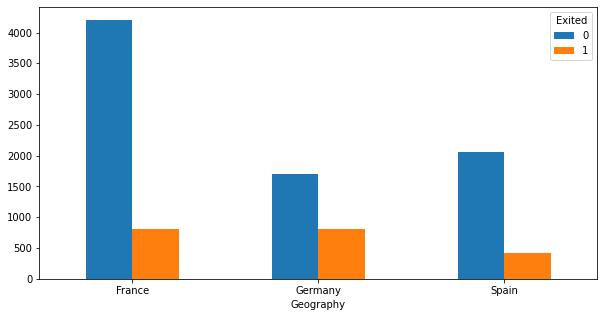

In [12]:
Geography_Crosstab=pd.crosstab(index=df.Geography,columns=df['Exited'])
print(Geography_Crosstab)
bars=('France','Germany','Spain')
y_pos = np.arange(len(bars))
Geography_Crosstab.plot.bar(figsize=(10,5), rot=0)
plt.xticks(y_pos,bars)

Exited            0     1
NumOfProducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60


<Axes: xlabel='NumOfProducts'>

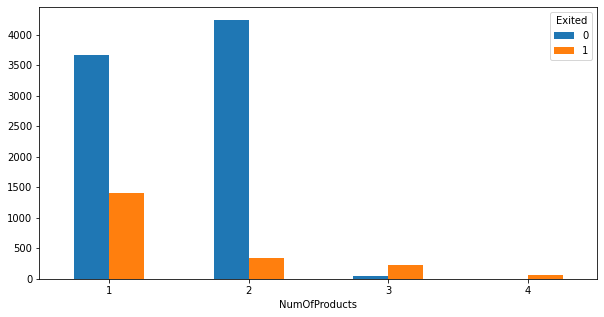

In [13]:
Products_Crosstab=pd.crosstab(index=df.NumOfProducts,columns=df['Exited'])
print(Products_Crosstab)
Products_Crosstab.plot.bar(figsize=(10,5), rot=0)

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424


([<matplotlib.axis.XTick at 0x1dca3b312e0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

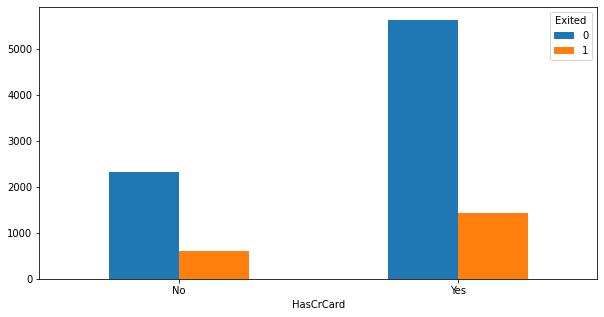

In [14]:
HasCrCard_Crosstab=pd.crosstab(index=df.HasCrCard,columns=df['Exited'])
print(HasCrCard_Crosstab)
bars=('No','Yes')
y_pos = np.arange(len(bars))
HasCrCard_Crosstab.plot.bar(figsize=(10,5), rot=0)
plt.xticks(y_pos,bars)

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


([<matplotlib.axis.XTick at 0x1dca3c095b0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

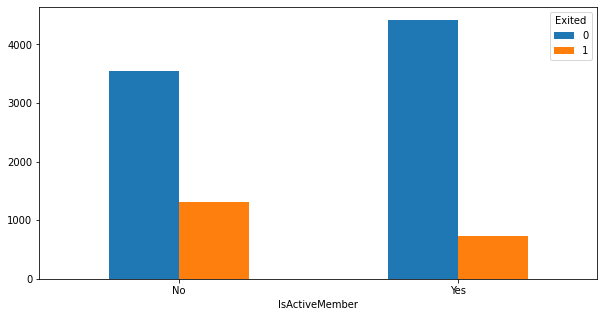

In [15]:
IsActiveMember_Crosstab=pd.crosstab(index=df.IsActiveMember,columns=df['Exited'])
print(IsActiveMember_Crosstab)
bars=('No','Yes')
y_pos = np.arange(len(bars))
IsActiveMember_Crosstab.plot.bar(figsize=(10,5), rot=0)
plt.xticks(y_pos,bars)

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


<Axes: xlabel='Tenure'>

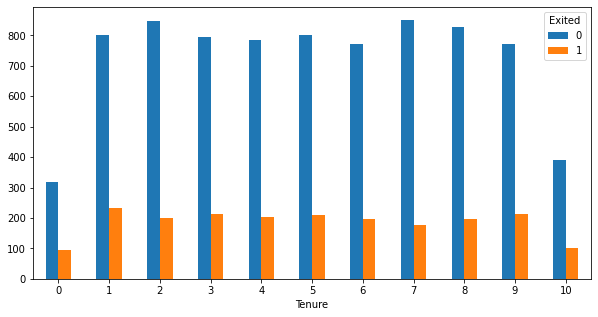

In [16]:
Tenure_Crosstab=pd.crosstab(index=df.Tenure,columns=df['Exited'])
print(Tenure_Crosstab)
Tenure_Crosstab.plot.bar(figsize=(10,5), rot=0)

In [17]:
# Number of observations in each predictor class
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Categorical Data

In [18]:
# One Hot Encoding
df = pd.get_dummies(df)

In [19]:
df.head(9)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1


## Outliers - Box Plot

Text(0.5, 1.0, '')

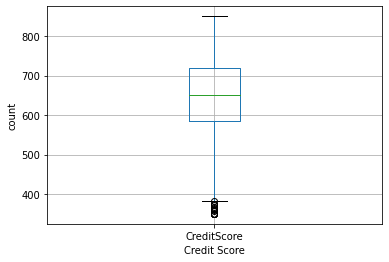

In [20]:
ax = df.boxplot(column='CreditScore')
ax.set_xlabel('Credit Score'); ax.set_ylabel('count')
plt.suptitle('') # Suppress the titles
plt.title('')

Text(0.5, 1.0, '')

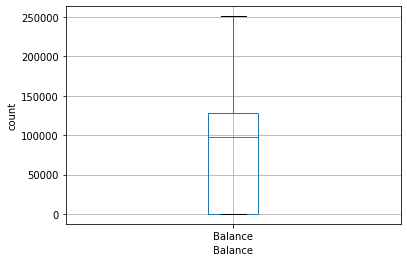

In [21]:
ax = df.boxplot(column='Balance')
ax.set_xlabel('Balance'); ax.set_ylabel('count')
plt.suptitle('') # Suppress the titles
plt.title('')

Text(0.5, 1.0, '')

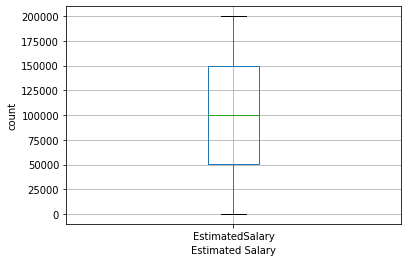

In [22]:
ax = df.boxplot(column='EstimatedSalary')
ax.set_xlabel('Estimated Salary'); ax.set_ylabel('count')
plt.suptitle('') # Suppress the titles
plt.title('')

## Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
columns = ['CreditScore','Balance','EstimatedSalary','Age']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [24]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


## Choosing predictors and target variable for predictive modelling

In [25]:
X = df.iloc[:,:-1].drop('Exited',axis=1)
y = df['Exited']

## Validation Split

In [26]:
#Implementing cross validation

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, random_state=None)

## ML Algorithm 1: ANN

In [27]:
# train neural network with 1-15 hidden nodes
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

num_of_nodes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy=[]
for z in num_of_nodes:
    model = MLPClassifier(hidden_layer_sizes=(z), activation='relu', solver='adam',random_state=1,max_iter=1000)
    result = cross_val_score(model, X, y, cv = kf)
    print("Avg accuracy: {}".format(result.mean()))
    accuracy.append(result.mean())

Avg accuracy: 0.7963
Avg accuracy: 0.8285
Avg accuracy: 0.7963
Avg accuracy: 0.8314999999999999
Avg accuracy: 0.8574999999999999
Avg accuracy: 0.8514000000000002
Avg accuracy: 0.8552
Avg accuracy: 0.8495000000000001
Avg accuracy: 0.8609
Avg accuracy: 0.8521000000000001
Avg accuracy: 0.8583999999999999
Avg accuracy: 0.8598000000000001
Avg accuracy: 0.8596999999999999
Avg accuracy: 0.8379
Avg accuracy: 0.8484999999999999


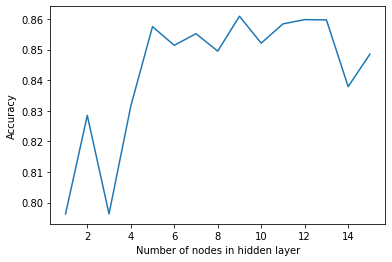

In [28]:
plt.plot(num_of_nodes, accuracy)
plt.xlabel("Number of nodes in hidden layer")
plt.ylabel("Accuracy")
plt.show()

In [29]:
# training neural network with number of hidden nodes = 9

model = MLPClassifier(hidden_layer_sizes=(9), activation='relu', solver='adam',random_state=1,max_iter=1000)
result = cross_val_predict(model, X, y, cv = kf)

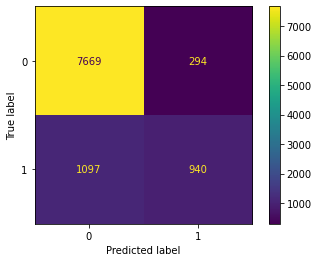

In [30]:
# Validation Performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## ML Algorithm 2: XgBoost (Ensemble Method)

In [31]:
from xgboost.sklearn import XGBClassifier

num_of_max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy1=[]
for z in num_of_max_depth:
    model = XGBClassifier(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           objective='binary:logistic',
                           max_depth=z,
                           learning_rate=0.01)
    result = cross_val_score(model, X, y, cv = kf)
    print("Avg accuracy: {}".format(result.mean()))
    accuracy1.append(result.mean())

Avg accuracy: 0.8523
Avg accuracy: 0.8605
Avg accuracy: 0.8634999999999999
Avg accuracy: 0.8657
Avg accuracy: 0.8646
Avg accuracy: 0.8651
Avg accuracy: 0.8634999999999999
Avg accuracy: 0.8619
Avg accuracy: 0.8587
Avg accuracy: 0.8566
Avg accuracy: 0.8559000000000001
Avg accuracy: 0.8550000000000001
Avg accuracy: 0.8545999999999999
Avg accuracy: 0.8519
Avg accuracy: 0.8542


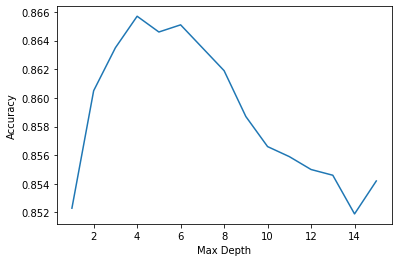

In [32]:
plt.plot(num_of_max_depth, accuracy1)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [33]:
# training dataset with max depth = 4

model = XGBClassifier(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           objective='binary:logistic',
                           max_depth=4,
                           learning_rate=0.01)
result = cross_val_predict(model, X, y, cv = kf)

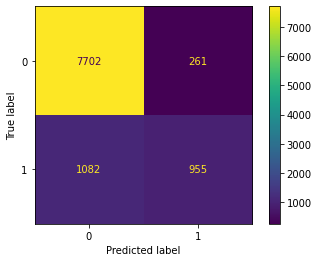

In [34]:
# Validation Performance

cm = confusion_matrix(y, result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## ML Algorithm 3: Logistic Regression

In [35]:
from sklearn.model_selection import cross_val_predict
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
result = cross_val_predict(model, X, y, cv = kf)

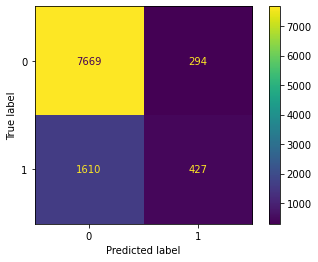

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Validation Performance

cm = confusion_matrix(y, result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Comparing all Machine Learning Algorithms Accuracy

Text(0, 0.5, 'Accuracy')

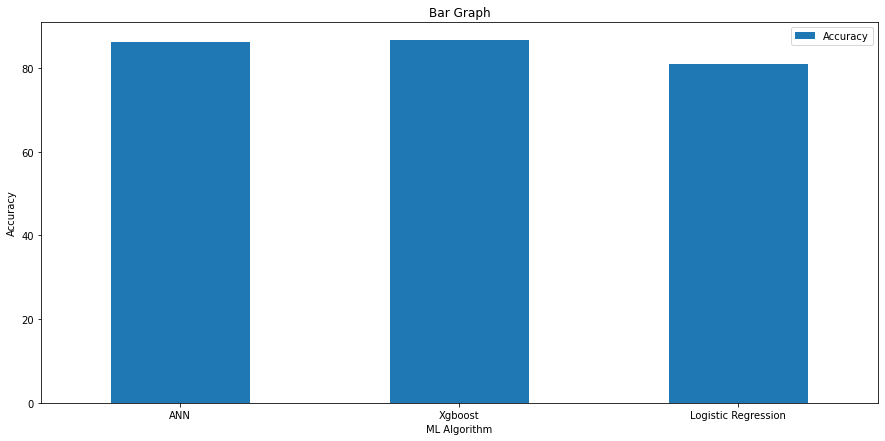

In [37]:
x=['ANN','Xgboost','Logistic Regression']
y=[86.09,86.57,80.96]

df = pd.DataFrame({'ML Algorithm': x,
                   'Accuracy': y},index=x)

ax = df.plot.bar(y='Accuracy',rot=0, figsize = (15, 7))
ax.set_title("Bar Graph")
ax.set_xlabel('ML Algorithm')
ax.set_ylabel('Accuracy')